## Steam Games Recommender System EDA

### Import Libraries 


In [2]:
import zipfile
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
games_zip_path = 'data/games.csv.zip'
recommendations_zip_path = 'data/recommendations.csv.zip'
users_zip_path = 'data/users.csv.zip'

games_csv_filename = 'games.csv'  
recommendations_csv_filename = 'recommendations.csv'  
users_csv_filename = 'users.csv'  

### Games CSV File EDA

In [5]:
# Open the games zip file
with zipfile.ZipFile(games_zip_path) as z:
    with z.open(games_csv_filename) as f:
        games_df = pd.read_csv(f)

games_df.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True


In [6]:
print(games_df.columns)
print(games_df.shape)
print(games_df.dtypes) 

Index(['app_id', 'title', 'date_release', 'win', 'mac', 'linux', 'rating',
       'positive_ratio', 'user_reviews', 'price_final', 'price_original',
       'discount', 'steam_deck'],
      dtype='object')
(50872, 13)
app_id              int64
title              object
date_release       object
win                  bool
mac                  bool
linux                bool
rating             object
positive_ratio      int64
user_reviews        int64
price_final       float64
price_original    float64
discount          float64
steam_deck           bool
dtype: object


#### Check for Duplicated Rows 
[Update after EDA] No duplicated row present

In [ ]:
# View only duplicated rows 
games_df[games_df.duplicated()]


,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck


In [47]:
games_df.duplicated().sum()


0

In [44]:
games_df.duplicated(subset=['title']).sum()


121

In [46]:
games_df[games_df.duplicated(subset=['title'], keep=False)].sort_values(by='title')


,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
31705,1099550,3D Organon Anatomy,2019-07-17,True,True,False,Mixed,50,70,0.00,0.00,0.0,True
7009,583620,3D Organon Anatomy,2017-06-23,True,True,False,Mixed,69,98,24.99,24.99,0.0,True
24768,842420,A Walk in the Woods,2018-05-01,True,False,False,Mixed,40,527,0.00,0.00,0.0,True
40919,557900,A Walk in the Woods,2020-04-21,True,False,False,Mostly Positive,73,83,0.00,0.00,0.0,True
13929,743640,Achievement Clicker,2017-11-17,True,False,False,Very Positive,84,2044,0.44,0.99,55.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25582,986080,Zombie Apocalypse,2019-03-09,True,False,False,Mostly Positive,72,40,1.99,1.99,0.0,True
24353,1690650,Zombie Survivors,2022-11-05,True,False,False,Mixed,63,58,2.99,2.99,0.0,True
21792,1933800,Zombie Survivors,2022-03-25,True,False,False,Mostly Negative,28,14,2.99,2.99,0.0,True
4893,1212100,fishy,2020-01-17,True,True,False,Very Positive,86,223,2.99,2.99,0.0,True


#### Check for Null Values 

[Update after EDA] No null values present

In [49]:
games_df.isnull().values.any()


False

#### Investigate on the spread of numerical variables

In [51]:
games_df.describe()

,app_id,positive_ratio,user_reviews,price_final,price_original,discount
count,5.087200e+04,50872.000000,5.087200e+04,50872.000000,50872.000000,50872.000000
mean,1.055224e+06,77.052033,1.824425e+03,8.620325,8.726788,5.592212
std,6.103249e+05,18.253592,4.007352e+04,11.514164,11.507021,18.606679
min,1.000000e+01,0.000000,1.000000e+01,0.000000,0.000000,0.000000
25%,5.287375e+05,67.000000,1.900000e+01,0.990000,0.990000,0.000000
50%,9.860850e+05,81.000000,4.900000e+01,4.990000,4.990000,0.000000
75%,1.524895e+06,91.000000,2.060000e+02,10.990000,11.990000,0.000000
max,2.599300e+06,100.000000,7.494460e+06,299.990000,299.990000,90.000000


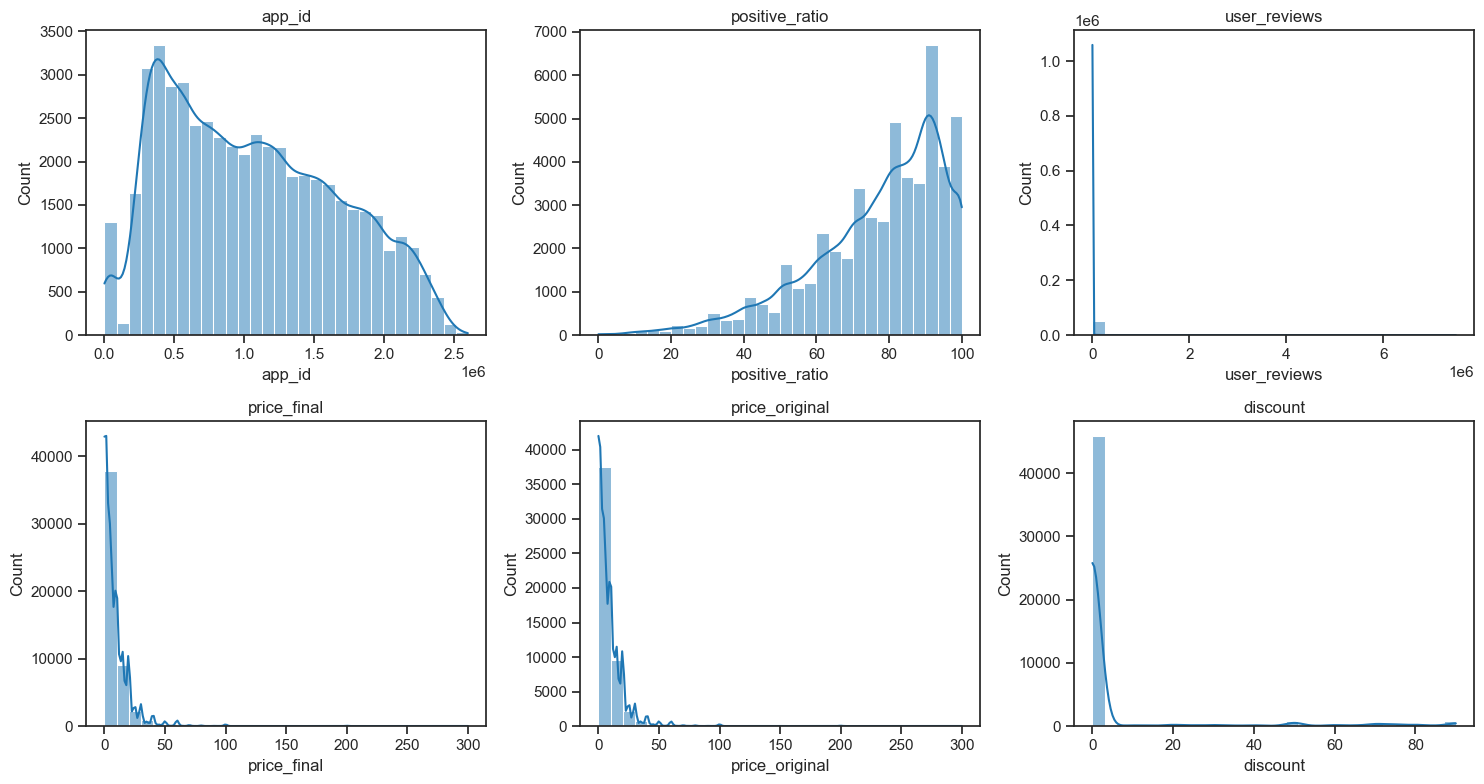

In [55]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

# Pick a minimal style without background grid
sns.set_style("ticks")          # or use "white" if you prefer no border ticks
sns.set_context("notebook")

numeric_cols = games_df.select_dtypes(include="number").columns
n_cols       = 3                                  # plots per row (change if you like)
n_rows       = math.ceil(len(numeric_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols,
                         figsize=(5 * n_cols, 4 * n_rows),
                         squeeze=False)

for i, col in enumerate(numeric_cols):
    ax = axes.flat[i]
    sns.histplot(
        data=games_df,
        x=col,
        kde=True,              # adds the KDE curve
        bins=30,
        ax=ax
    )
    ax.set_title(col, fontsize=12)
    ax.grid(False)             # explicitly remove grid lines

# Remove any unused sub-axes
for j in range(i + 1, len(axes.flat)):
    fig.delaxes(axes.flat[j])

plt.tight_layout()
plt.show()


/var/folders/7n/kfkq56_s0xq38bkg5x522_780000gn/T/ipykernel_39419/2648715815.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=games_df, x=col, palette='RdBu')
/var/folders/7n/kfkq56_s0xq38bkg5x522_780000gn/T/ipykernel_39419/2648715815.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=games_df, x=col, palette='RdBu')
/var/folders/7n/kfkq56_s0xq38bkg5x522_780000gn/T/ipykernel_39419/2648715815.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=games_df, x=col, palette='RdBu')
/var/folders/7n/kfkq56_s0xq38bkg5x522_78

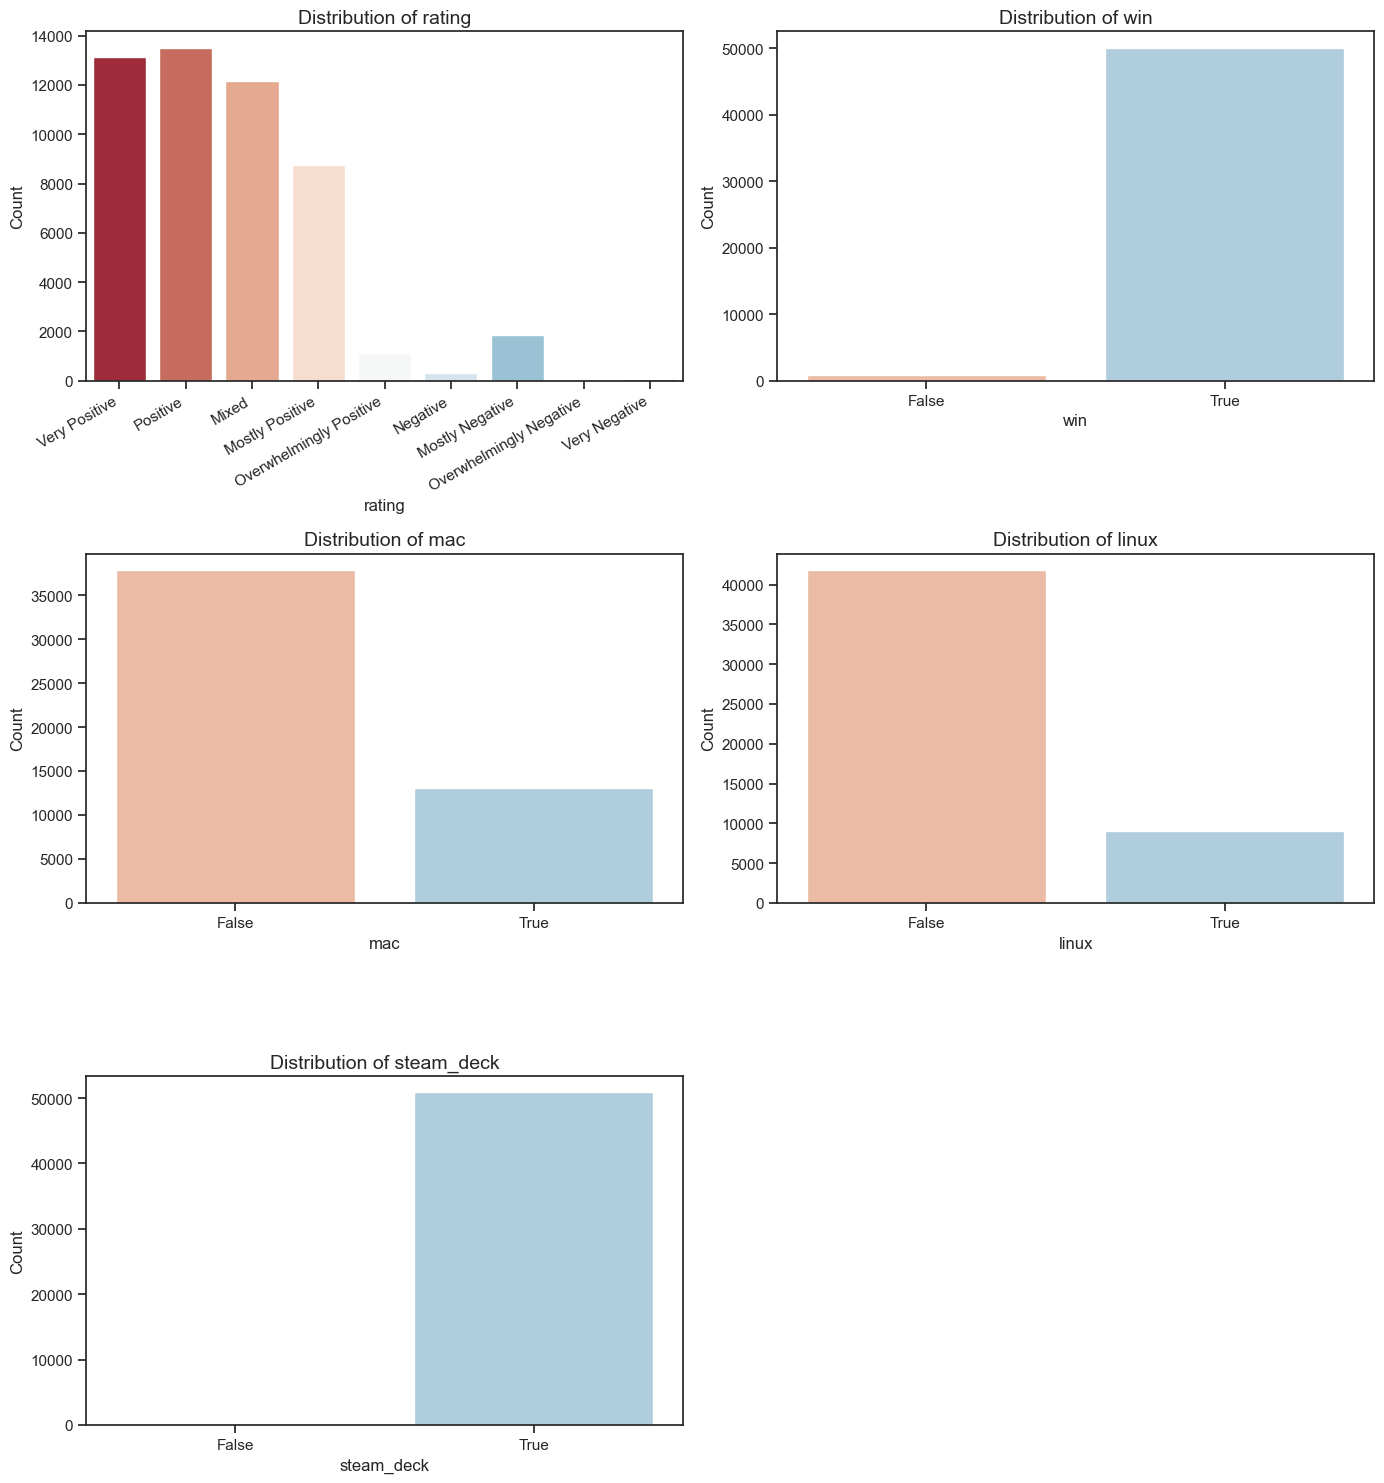

In [65]:
# Identify categorical columns (excluding 'title')
categorical_cols = ['rating', 'win', 'mac', 'linux', 'steam_deck']

# Set up the plot grid
n_cols = 2
n_rows = (len(categorical_cols) + 1) // n_cols

plt.figure(figsize=(14, 5 * n_rows))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=games_df, x=col, palette='RdBu')  
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.grid(False)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    
    # Rotate x-axis labels for 'rating' or any column with many/long categories
    if col == 'rating' or games_df[col].nunique() > 4:
        plt.xticks(rotation=30, ha='right')

plt.tight_layout()
plt.show()

In [62]:
# Count of each category
counts = games_df['rating'].value_counts()

# Percentage of each category
percentages = games_df['rating'].value_counts(normalize=True) * 100

# Combine into a DataFrame for clearer display
rating_summary = pd.DataFrame({
    'Count': counts,
    'Percentage (%)': percentages.round(2)
})

print(rating_summary)


                         Count  Percentage (%)
rating                                        
Positive                 13502           26.54
Very Positive            13139           25.83
Mixed                    12157           23.90
Mostly Positive           8738           17.18
Mostly Negative           1849            3.63
Overwhelmingly Positive   1110            2.18
Negative                   303            0.60
Very Negative               60            0.12
Overwhelmingly Negative     14            0.03


### Users CSV File EDA

In [4]:
# Open the games zip file
with zipfile.ZipFile(users_zip_path) as z:
    with z.open(users_csv_filename) as f:
        users_df = pd.read_csv(f)

users_df.head()

,user_id,products,reviews
0,7360263,359,0
1,14020781,156,1
2,8762579,329,4
3,4820647,176,4
4,5167327,98,2


In [5]:
print(users_df.columns)
print(users_df.shape)
print(users_df.dtypes) 

Index(['user_id', 'products', 'reviews'], dtype='object')
(14306064, 3)
user_id     int64
products    int64
reviews     int64
dtype: object


#### Check for Duplicated Rows
[Update after] No duplicated rows seen 

In [ ]:
# Check if there are duplicate rows
duplicate_rows = users_df[users_df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 0


#### Check for Null Values 
[Update After EDA] No Null values seen

In [68]:
print("Null values per column:")
print(users_df.isnull().sum())


Null values per column:
user_id     0
products    0
reviews     0
dtype: int64


#### Investigate on the spread of numerical variables
- Understand the spread and central tendency of how many products users buy and reviews they write.
- Plot histograms or density plots of products and reviews to see their distribution 
- Plot boxplots to identify outliers 
- Clean up the data
- Scatter plot of products vs reviews — to see if users who buy more also tend to write more reviews.
- Calculate correlation coefficient between products and reviews.


In [11]:
users_df.describe()


,user_id,products,reviews
count,1.430606e+07,1.430606e+07,1.430606e+07
mean,7.153032e+06,1.163734e+02,2.876738e+00
std,4.129805e+06,2.438515e+02,7.987421e+00
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.576516e+06,2.300000e+01,1.000000e+00
50%,7.153032e+06,5.500000e+01,1.000000e+00
75%,1.072955e+07,1.270000e+02,3.000000e+00
max,1.430606e+07,3.221400e+04,6.045000e+03


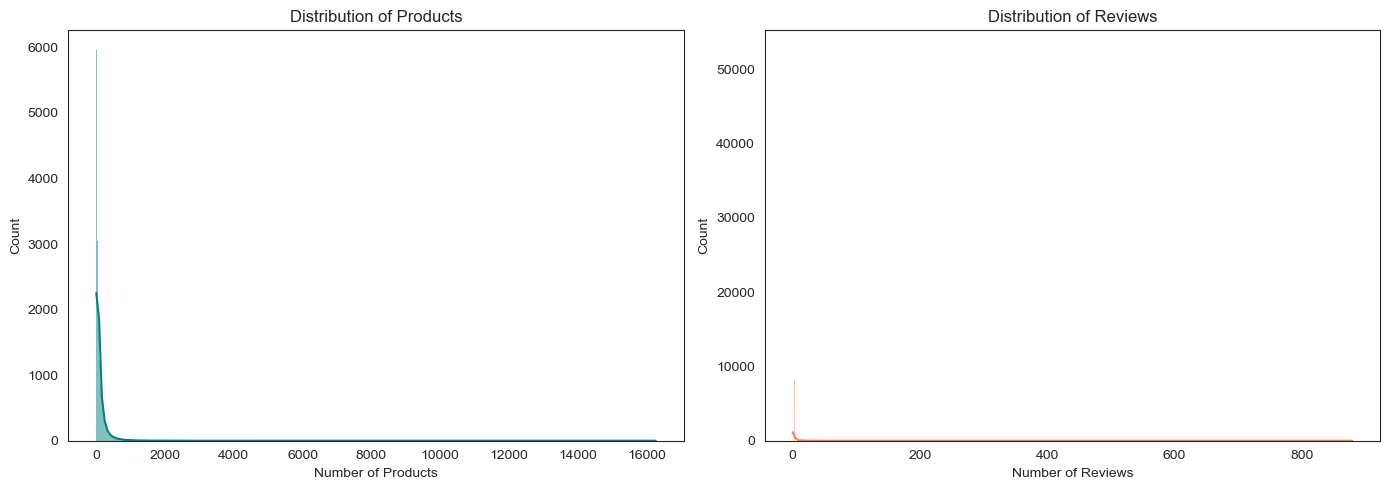

In [6]:
# Set a clean style without grid
sns.set_style("white")

# Using a subset to speed up plotting 
sample_df = users_df.sample(n=100000, random_state=42)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram + KDE for products
sns.histplot(sample_df['products'], kde=True, ax=axes[0], color='teal')
axes[0].set_title('Distribution of Products')
axes[0].set_xlabel('Number of Products')
axes[0].set_ylabel('Count')
axes[0].grid(False)  # Remove grid

# Histogram + KDE for reviews
sns.histplot(sample_df['reviews'], kde=True, ax=axes[1], color='coral')
axes[1].set_title('Distribution of Reviews')
axes[1].set_xlabel('Number of Reviews')
axes[1].set_ylabel('Count')
axes[1].grid(False)  # Remove grid

plt.tight_layout()
plt.show()


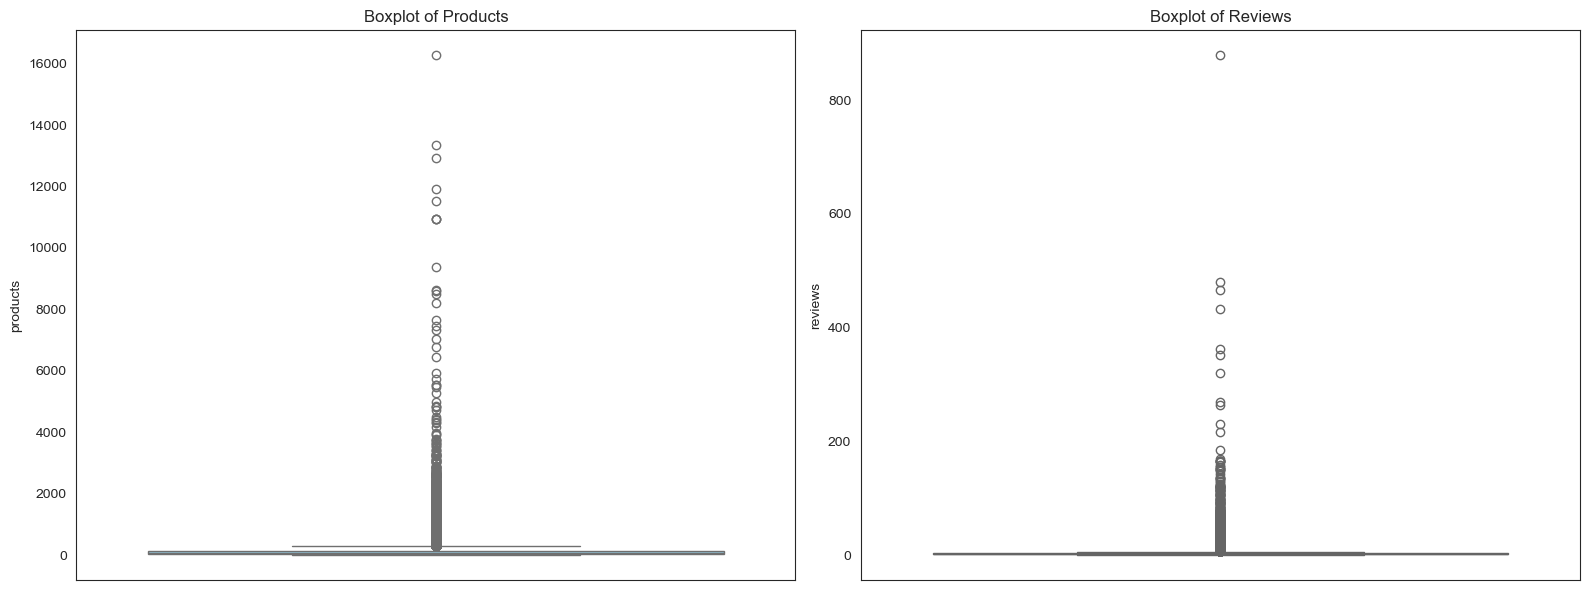

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(data=sample_df, y='products', ax=axs[0], color='skyblue')
axs[0].set_title('Boxplot of Products')

sns.boxplot(data=sample_df, y='reviews', ax=axs[1], color='coral')
axs[1].set_title('Boxplot of Reviews')

plt.tight_layout()
plt.show()

In [9]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from both columns
cleaned_users_df = remove_outliers_iqr(users_df, 'products')
cleaned_users_df = remove_outliers_iqr(cleaned_users_df, 'reviews')


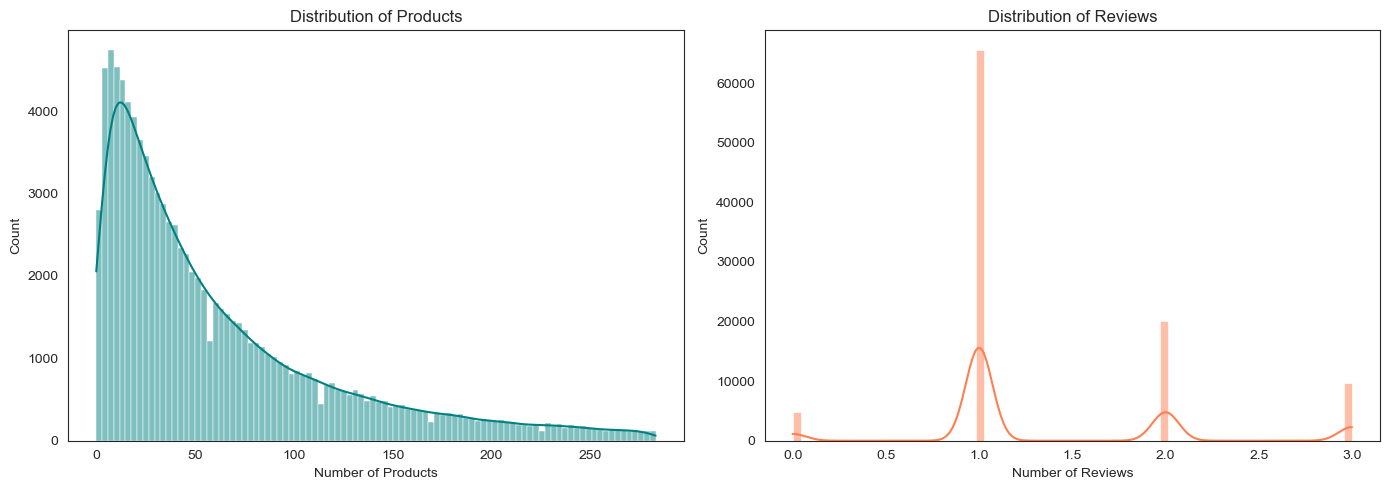

In [11]:
# Set a clean style without grid
sns.set_style("white")

# Using a subset to speed up plotting 
sample_cleaned_df = cleaned_users_df.sample(n=100000, random_state=42)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram + KDE for products
sns.histplot(sample_cleaned_df['products'], kde=True, ax=axes[0], color='teal')
axes[0].set_title('Distribution of Products')
axes[0].set_xlabel('Number of Products')
axes[0].set_ylabel('Count')
axes[0].grid(False)  # Remove grid

# Histogram + KDE for reviews
sns.histplot(sample_cleaned_df['reviews'], kde=True, ax=axes[1], color='coral')
axes[1].set_title('Distribution of Reviews')
axes[1].set_xlabel('Number of Reviews')
axes[1].set_ylabel('Count')
axes[1].grid(False)  # Remove grid

plt.tight_layout()
plt.show()


In [13]:
sample_cleaned_df.describe()

,user_id,products,reviews
count,1.000000e+05,100000.000000,100000.000000
mean,6.991308e+06,61.882290,1.345550
std,4.168847e+06,60.345663,0.716582
min,1.800000e+01,0.000000,0.000000
25%,3.355802e+06,17.000000,1.000000
50%,6.892304e+06,41.000000,1.000000
75%,1.055226e+07,86.000000,2.000000
max,1.430597e+07,283.000000,3.000000


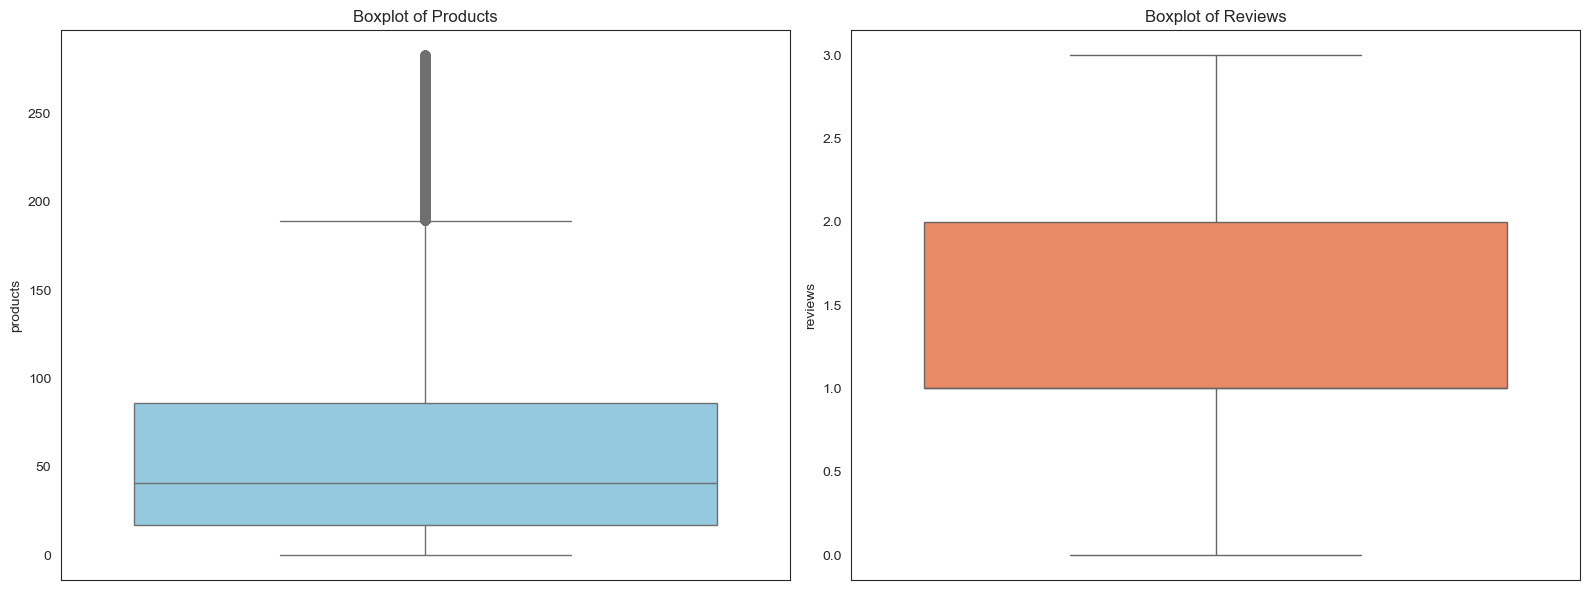

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Using a subset to speed up plotting 
sample_cleaned_df = cleaned_users_df.sample(n=100000, random_state=42)

sns.boxplot(data=sample_cleaned_df, y='products', ax=axs[0], color='skyblue')
axs[0].set_title('Boxplot of Products')

sns.boxplot(data=sample_cleaned_df, y='reviews', ax=axs[1], color='coral')
axs[1].set_title('Boxplot of Reviews')

plt.tight_layout()
plt.show()

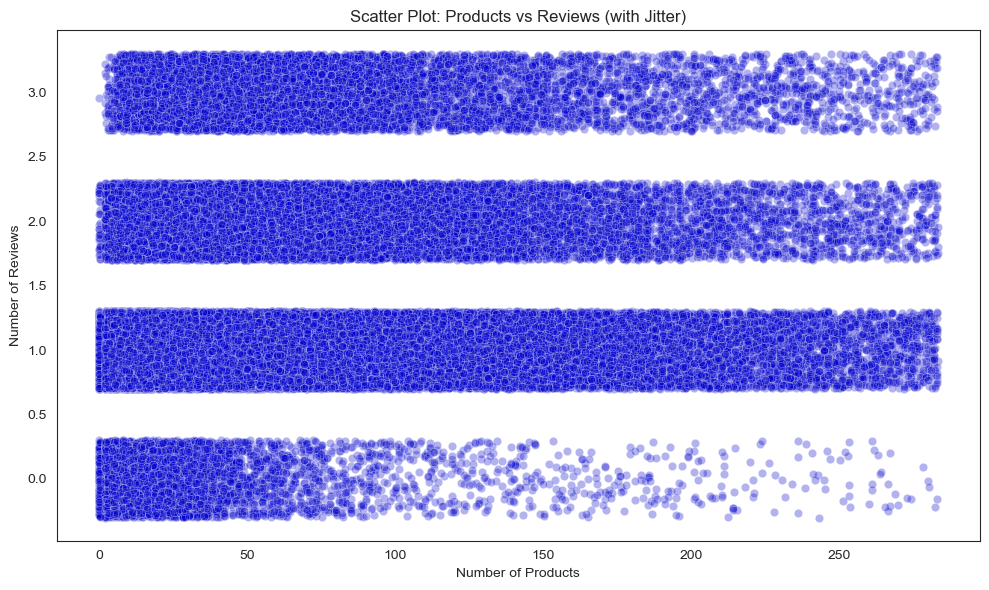

In [17]:
# Using a subset to speed up plotting 
sample_cleaned_df = cleaned_users_df.sample(n=100000, random_state=42)

# Add jitter to both variables
sample_cleaned_df['products_jittered'] = sample_cleaned_df['products'] + np.random.uniform(-0.3, 0.3, size=len(sample_cleaned_df))
sample_cleaned_df['reviews_jittered'] = sample_cleaned_df['reviews'] + np.random.uniform(-0.3, 0.3, size=len(sample_cleaned_df))

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=sample_cleaned_df,
    x='products_jittered',
    y='reviews_jittered',
    alpha=0.3,
    color='mediumblue'
)
plt.title("Scatter Plot: Products vs Reviews (with Jitter)")
plt.xlabel("Number of Products")
plt.ylabel("Number of Reviews")
plt.grid(False)
plt.tight_layout()
plt.show()


### Recommendations CSV File EDA

In [31]:
# Open the games zip file
with zipfile.ZipFile(recommendations_zip_path) as z:
    with z.open(recommendations_csv_filename) as f:
        recommendations_df = pd.read_csv(f)

recommendations_df.head()

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,0,0,2022-12-12,True,36.3,51580,0
1,304390,4,0,2017-02-17,False,11.5,2586,1
2,1085660,2,0,2019-11-17,True,336.5,253880,2
3,703080,0,0,2022-09-23,True,27.4,259432,3
4,526870,0,0,2021-01-10,True,7.9,23869,4


In [32]:
print(recommendations_df.columns)
print(recommendations_df.shape)

Index(['app_id', 'helpful', 'funny', 'date', 'is_recommended', 'hours',
       'user_id', 'review_id'],
      dtype='object')
(41154794, 8)
